<a href="https://colab.research.google.com/github/gladysbabs/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
 - Author: Gladys Nacuka Babirye Bagandanswa


 ## Project Overview

## Load and Inspect Data

In [ ]:
import pandas as pd
fpath= "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales_prediction = pd.read_csv(fpath)

In [ ]:
df_sales_prediction.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
df_sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## How to Clean Data

How many rows?
8523

How many columns?
12

### Adressing any descrepancies in datatypes

In [ ]:
#What are the datatypes of each variable?
df_sales_prediction.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Are there duplicates? If so, drop any duplicates.
df_sales_prediction_duplicated=df_sales_prediction.duplicated(keep=False)
df_sales_prediction_duplicated.sum()

0

- There are no duplicates

###Addressing Missing Values

In [ ]:
#missing values.
missing_values=df_sales_prediction.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Getting the percentage ratios of missing values:
missing_values/len(df_sales_prediction)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

- There are missing values in the Item_Weight column with 17%
- There are missing values in the Outlet_Size column with 28%

In [ ]:
#For purposes of visualization, I temporarily addressed the missing values:

#Adressing the missing values in the Item_weight column with the mean of the Item_weight values.
item_weight_av=df_sales_prediction['Item_Weight'].mean()
df_sales_prediction['Item_Weight']=df_sales_prediction['Item_Weight'].fillna(item_weight_av)

In [ ]:
df_sales_prediction['Item_Weight'].isna().sum()

0

In [ ]:
#Filling the missing values in the Outlet_Size column with 'MISSING'.
df_sales_prediction['Outlet_Size']=df_sales_prediction['Outlet_Size'].fillna('MISSING')

In [ ]:
#Checking result if there're still missing values:
df_sales_prediction.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Checking for Inconsistencies in the Data

In [ ]:
#Assigning object columns to a variable:
cols_obj=df_sales_prediction.select_dtypes(object)
cols_obj.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
#Performing a value count on all the string datatype columns:
for cols in cols_obj:
  print(f"The value count for {cols}")
  print(df_sales_prediction[cols].value_counts())
  print('\n')

The value count for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The value count for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value count for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value count for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OU

- There is an inconsistency observed in the **Item_Fat_Content** column. So we need to rectify that. **LF** should be **Low Fat**, **reg** should be **Regular**, **low fat** should be **Low Fat**.


In [ ]:
#Addressing the inconsistencies in the column: Item_Fat_Content
df_sales_prediction['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
#Checking results:
df_sales_prediction.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
col_num=df_sales_prediction.select_dtypes('number')
col_num.describe().loc[['min','max','mean']]

Item_Weight  Item_Visibility    Item_MRP  Outlet_Establishment_Year  \
min      4.555000         0.000000   31.290000                1985.000000   
max     21.350000         0.328391  266.888400                2009.000000   
mean    12.857645         0.066132  140.992782                1997.831867   

      Item_Outlet_Sales  
min           33.290000  
max        13086.964800  
mean        2181.288914

- No inconsistences observed in the numerical columns.

## Exploratory Data Analysis

###Univariant Plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-18-bafa622c15de>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


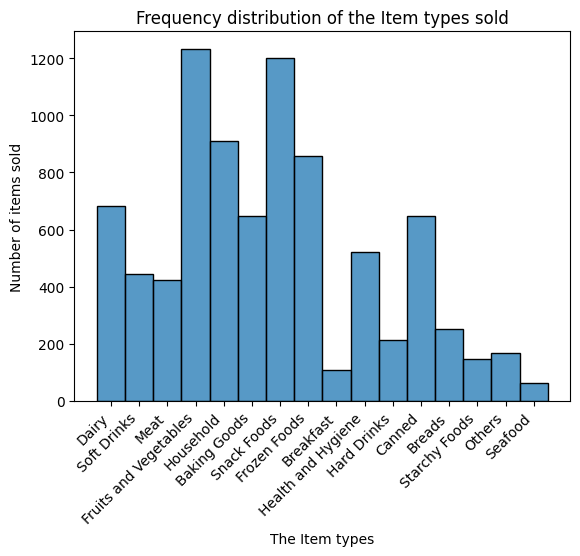

In [ ]:
#Histogram of various Item_Types:
ax=sns.histplot(df_sales_prediction,x='Item_Type')
ax.set_xlabel('The Item types')
ax.set_ylabel('Number of items sold')
ax.set_title('Frequency distribution of the Item types sold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- It can clearly be seen that Fruits and vegetables sell the most, followed by snack foods.

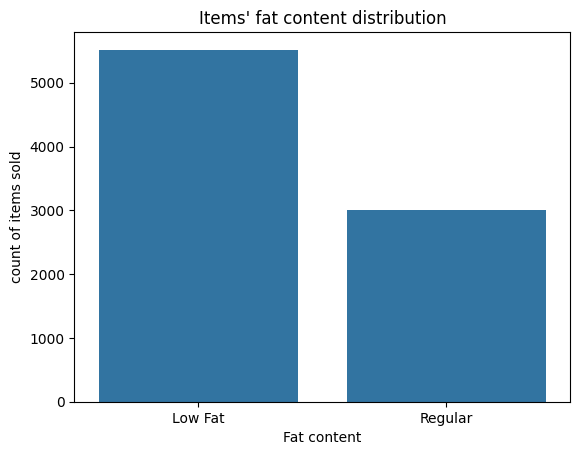

In [ ]:
#countplot showing Item_Fat_Content:
ax=sns.countplot(df_sales_prediction,x='Item_Fat_Content')
ax.set_xlabel('Fat content')
ax.set_ylabel('count of items sold')
ax.set_title("Items' fat content distribution");

- Low fat items sold more off the shelves.

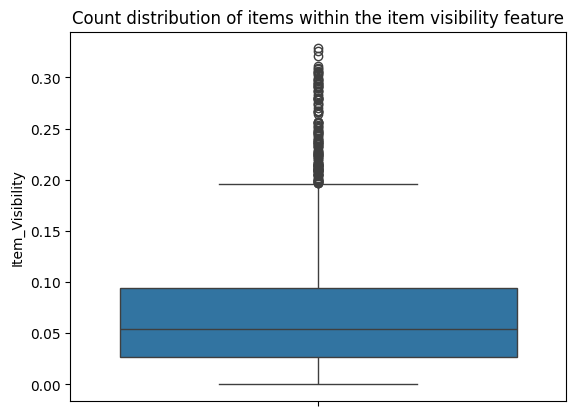

In [ ]:
#Boxplot showing Item_Visibility:
ax=sns.boxplot(df_sales_prediction,y='Item_Visibility')
ax.set_title('Count distribution of items within the item visibility feature');

- The median of the Item visibility is at 0.05 which is quite low and there are more outliers with visibility beyond 0.2, most probably indicating that these items have a prerequisite for branding and packaging so as to continuously improve their visibility on the shelves.

###Multivariant Plots

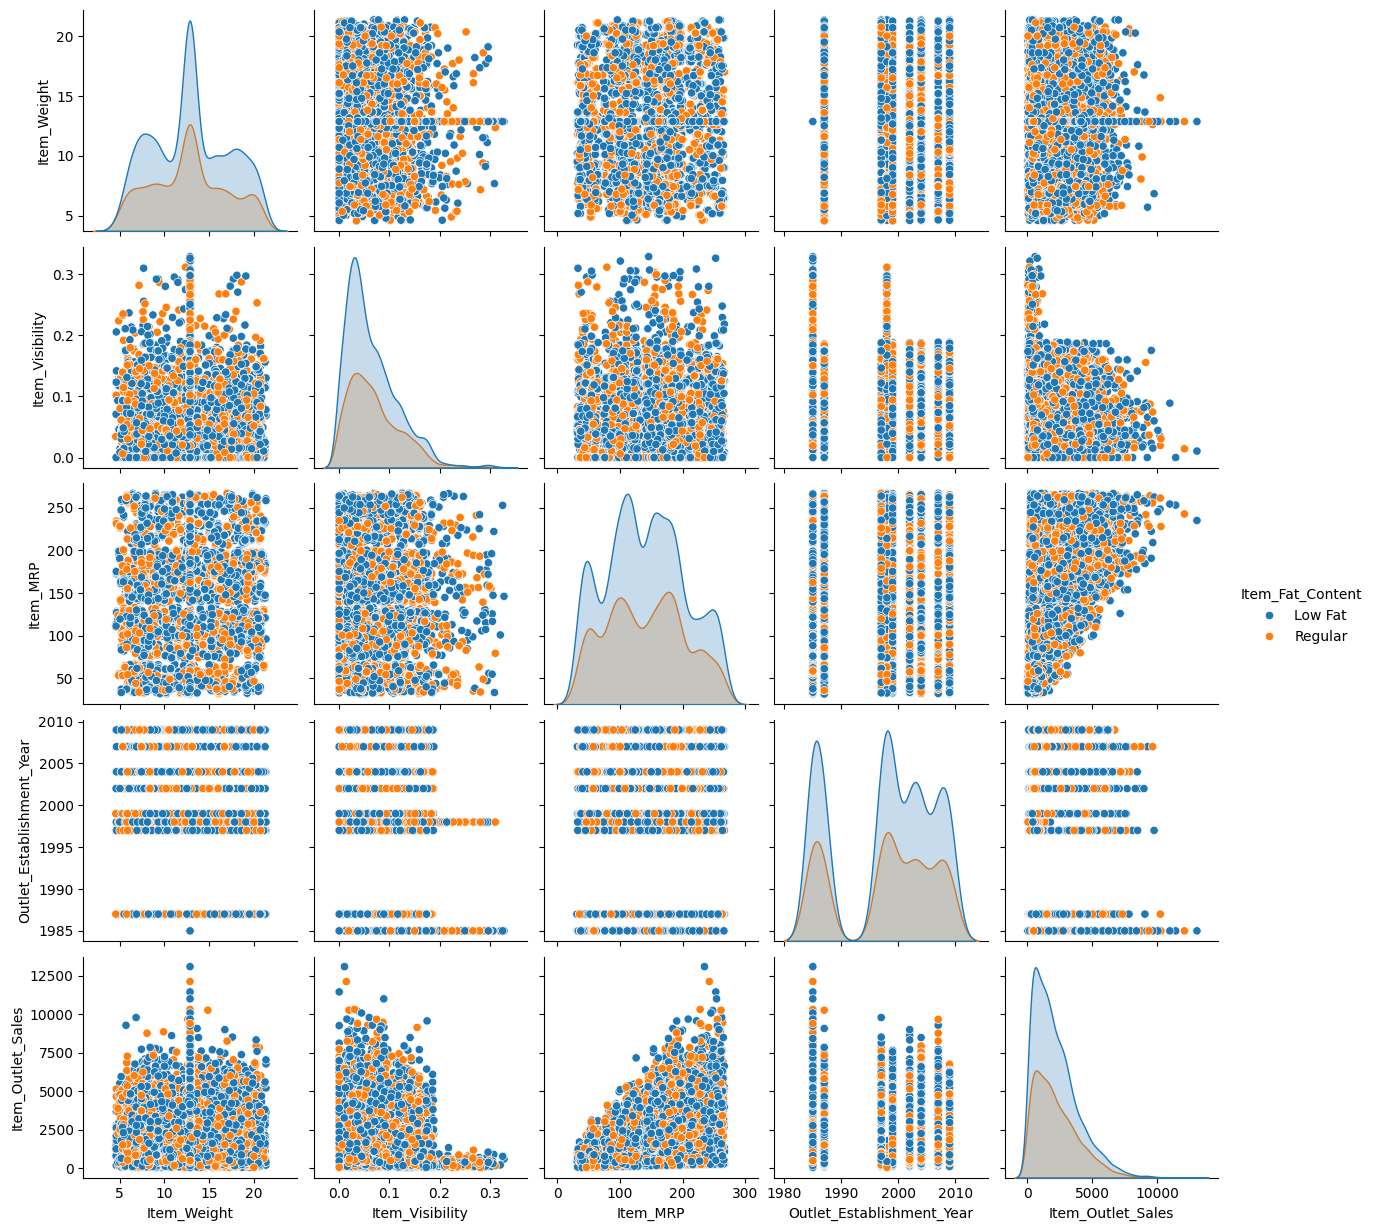

In [ ]:
#Pairplot to show paired relationships between numerical variables in the sales data
ax=sns.pairplot(df_sales_prediction,hue='Item_Fat_Content')

- In this pairplot, it's observed that there is a distinct negative correlation between Item_Outlet_Sales & Item_Visibility(as Item visibilty increases, Item_Outlet_Sales descrease and vice versa), between Item_Outlet_Sales & Item_MRP there is a postive correlation (As Item_MRP increases, the Item_Outlet_Sales are also increasing and vice versa).
- The negative correlation between tem_Outlet_Sales & Item_Visibility needs further investigation and information from the stakeholders since in the real world it's presumed that increased item visibility should inturn bring in more sales.

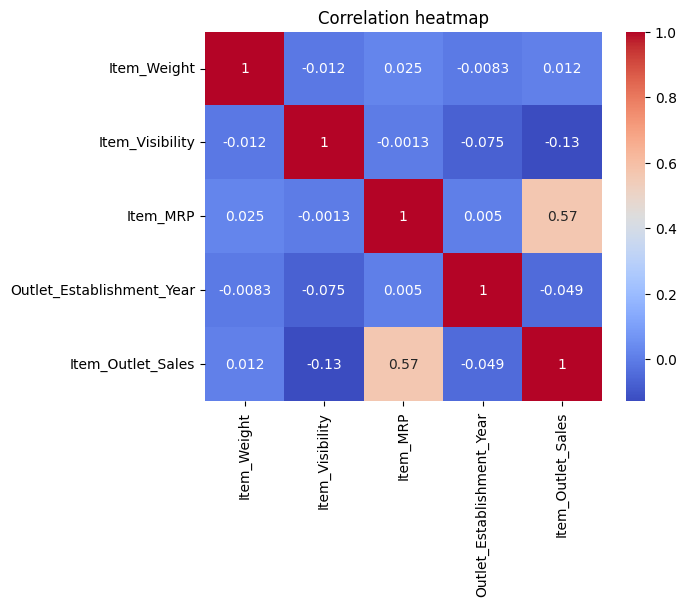

In [ ]:
#Heatmap further showing the different correlation types between the numeric columns in the sales data:
corr_df=df_sales_prediction.corr(numeric_only=True)
ax=sns.heatmap(corr_df,cmap='coolwarm',annot=True)
ax.set_title('Correlation heatmap');

- It is affirmed that there is a positive correlation observed between Item_Outlet_Sales & Item_MRP.
And a negative correlation observed between Item_Outlet_sales & Item_Visibility.

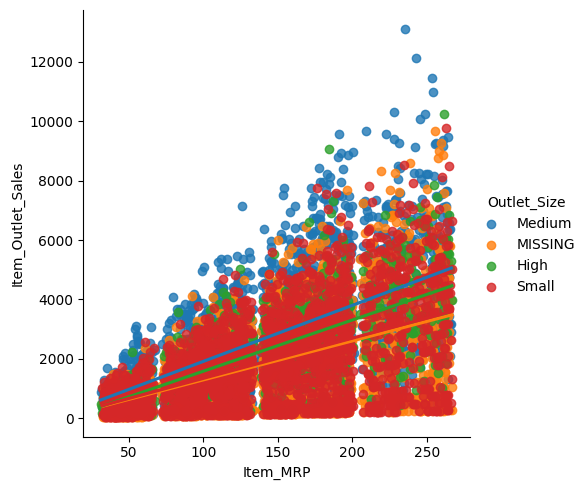

In [ ]:
#lmplot to further explain in detail, the positive correlation between Item_MRP and Item_Outlet_Sales within different Oulet_Sizes.
ax=sns.lmplot(df_sales_prediction,x='Item_MRP',y='Item_Outlet_Sales', hue='Outlet_Size');

- The Small outlets are predominantly moving most of the item sales as shown.

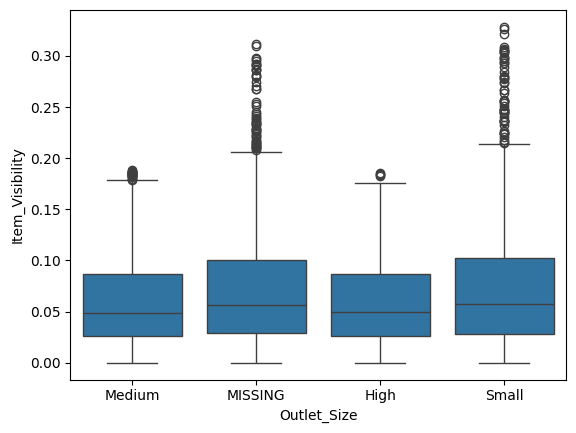

In [ ]:
#boxplot showing the relationship between item_visibility & outlet size
ax=sns.boxplot(df_sales_prediction,x='Outlet_Size',y='Item_Visibility')

- The boxplot for the Item_Visibility measurement for the different outlet sizes shows that small outlet sizes have a high median value. There is a minimal variation in the measurement for High outlet sizes.
- There are more outliers in the boxplot for the small and the 'MISSING' outlet sizes.

## Feature Inspection
### Addressing placeholders with null values

In [ ]:
#For the missing values addressed in my data cleaning section above, I need to remove the placeholders I added and replace them with null values.

#Re-loading that dataset:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fpath= "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales_prediction = pd.read_csv(fpath)
df_sales_prediction.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
missing_values=df_sales_prediction.isna().sum()
#Getting the percentage of missing values per column:
missing_values_perc=missing_values/len(df_sales_prediction)*100
#Result check:
missing_values_perc

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
#Starting with Outlet_Size column:
df_sales_prediction['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- Outlet_Size already has the placeholder for null values

In [ ]:
# Then the Item_Weight column:
df_sales_prediction['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

- Item_Weight also already has the placeholder for null values.

In [ ]:
df_sales_prediction.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Univariant Visualization
- **I want to define a function that will create univariant visualization showing the distribution of values/categories**

In [ ]:
# Fuction to plot a histogram, showing missing_values, quasi/constant, and cardinality
def histo_viz(df, x, figsize=(10, 5)):
    null_count = df_sales_prediction[x].isna().sum()
    null_perc = null_count / len(df_sales_prediction) * 100

    # Plotting
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(data=df_sales_prediction, x=x, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"Column: {x}")
    ax.set_xlabel(x)
    fig.tight_layout()
    plt.show()

    # Cardinality
    cardinality = df_sales_prediction[x].nunique()

    # Quasi or constant
    val_counts = df_sales_prediction[x].value_counts(dropna=False)
    most_common_val = val_counts.index[0]
    freq = val_counts.values[0]
    perc_most_common = freq / len(df_sales_prediction) * 100

    print(f"- NaN's Found: {null_count} ({round(null_perc, 2)}%)")
    print(f"- Unique Values: {cardinality}")
    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")

    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")

    if cardinality > 10:
        print("The cardinality is high (>10).")
    else:
        print("The cardinality is not high (<=10).")

    return fig, ax

In [ ]:
# Fuction to plot a countplot, showing missing_values, quasi/constant, and cardinality
def categorical_viz(df_sales_prediction, x, figsize=(10, 5), order=None, step_size=100):
    null_count = df_sales_prediction[x].isna().sum()
    null_perc = null_count / len(df_sales_prediction) * 100

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=df_sales_prediction, x=x, order=order, ax=ax)
    ax.set_title(f"Column: {x}")

    # Get xtick labels
    labels = ax.get_xticklabels()

    # Calculate step size based on the number of labels
    step_size = max(len(labels) // 10, 1)  # Adjust divisor as needed

    # Set xticks with adjusted step size
    ax.set_xticks(range(0, len(labels), step_size))
    ax.set_xticklabels(labels[::step_size], rotation=45, ha='right', fontsize=8)

    fig.tight_layout()
    plt.show()

    # Null values
    print(f"- NaN's Found: {null_count} ({round(null_perc, 2)}%)")

    # Cardinality
    cardinality = df_sales_prediction[x].nunique()
    print(f"- Unique Values: {cardinality}")
    if cardinality > 10:
        print("The cardinality is high (>10).")
    else:
        print("The cardinality is not high (<=10).")

    # Quasi or constant
    val_counts = df_sales_prediction[x].value_counts(dropna=False)
    most_common_val = val_counts.index[0]
    freq = val_counts.values[0]
    perc_most_common = freq / len(df_sales_prediction) * 100

    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")

    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")

    return fig, ax


#### Item_Identifier
- Unique product ID.


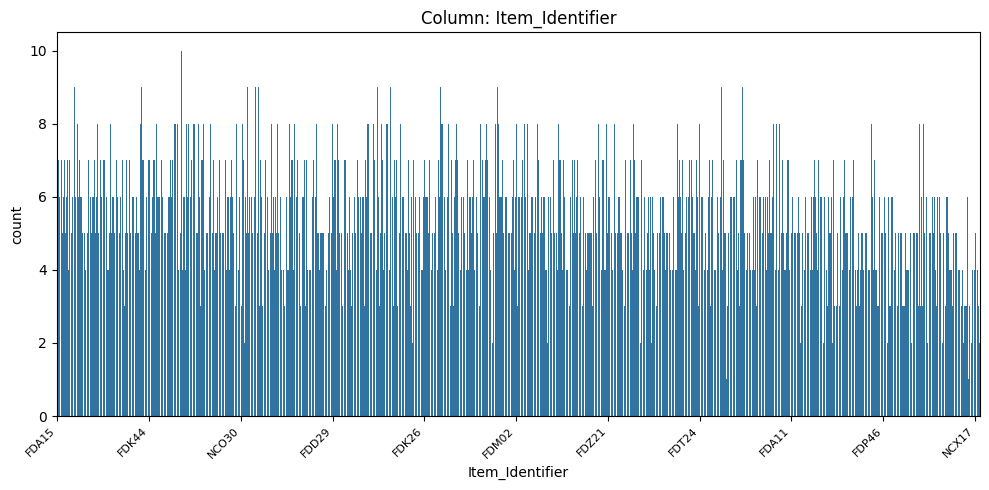

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
The cardinality is high (>10).
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
categorical_viz(df_sales_prediction,x='Item_Identifier');

- What type of feature is it?
 - This is a Numeric feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values therefore no need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is high.
- Would we know this before the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, while this feature is statistically significant, it does not contribute meaningfully to achieving the Sale price. It may even introduce biases in our analysis.

#### Item_Weight
- Weight of product.

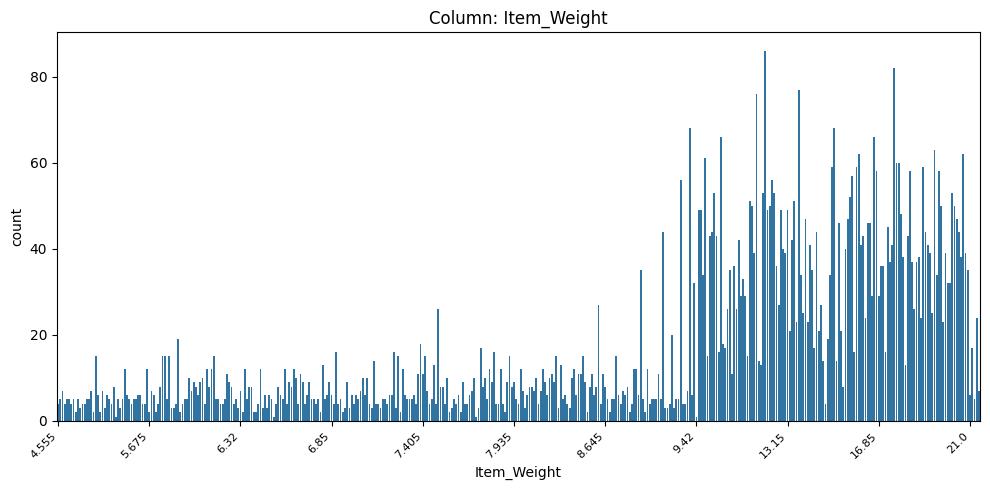

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
The cardinality is high (>10).
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
categorical_viz(df_sales_prediction,x='Item_Weight');

- What type of feature is it?
 - This is a Numeric feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 1463 null values(17.17%). Therefore I would most probably impute the null values by replacing them with the mean, median, or mode.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is high.
- Would we know this before the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - No. Because in most cases this feature contributes to the analysis of the Sale price prediction.

#### Item_Fat_Content
- Whether the product is low fat or not.

<ipython-input-61-2e49b998f4a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


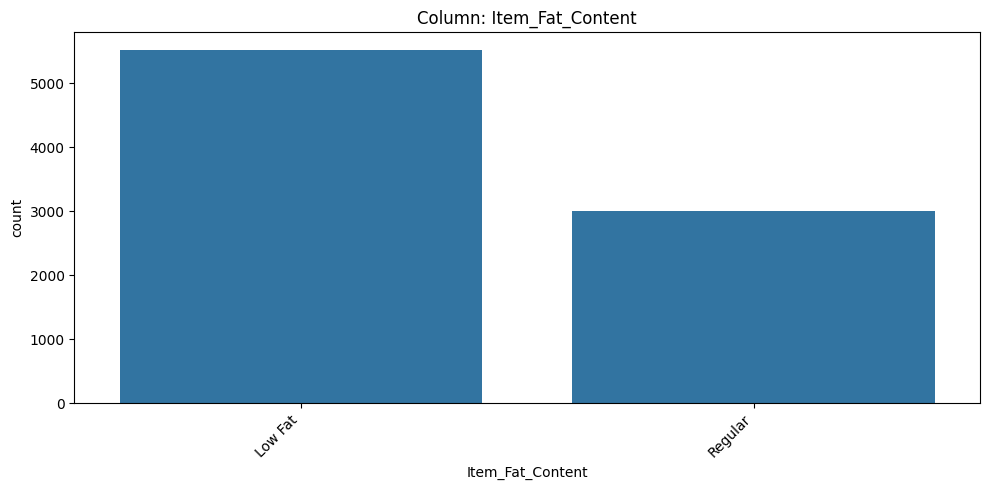

- NaN's Found: 0 (0.0%)
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.
The cardinality is not high (<=10).


In [ ]:
# Run the above cell that addressed the inconsistencies with the 'Fat_Content' column:
categorical_viz(df_sales_prediction,x='Item_Fat_Content');

- What type of feature is it?
 - This is a categorical feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. Therefore no need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is low.
- Would we know this before the target is determined?
 - No.
- Is there a business case/understanding reason to exclude based on our business case?
 - No. This is mainly centered around customer tastes and preferences also.Therefore we need this feature for our business case.

#### Item_Visibility
- The % of the total display area of all products in a store allocated to the particular product.

<ipython-input-5-19821353808f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


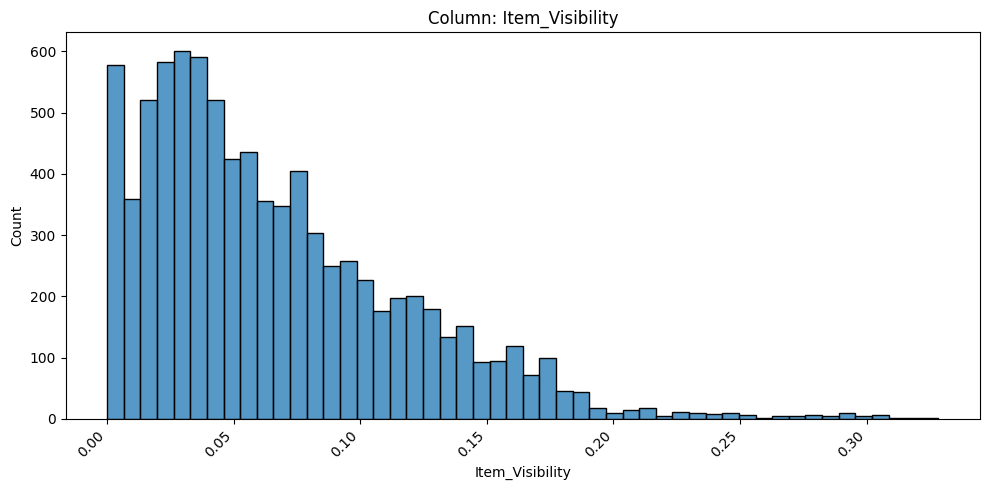

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.
The cardinality is high (>10).


In [ ]:
histo_viz(df_sales_prediction, x='Item_Visibility');

- What type of feature is it?
 - This is a Numeric feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is high.
- Would we know this before the target is determined?
 - No.
- Is there a business case/understanding reason to exclude based on our business case?
 - No. In most cases the item visibility plays a significant role in Sale price prediction.

####Item_Type
- The category to which the product belongs.

<ipython-input-61-2e49b998f4a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


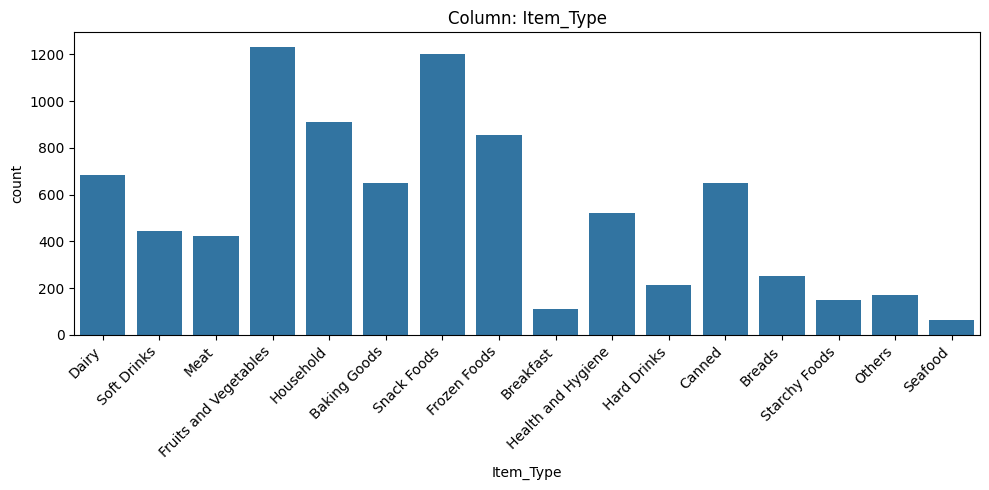

- NaN's Found: 0 (0.0%)
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.
The cardinality is high (>10).


In [ ]:
categorical_viz(df_sales_prediction,x='Item_Type');

- What type of feature is it?
 - This is a categorical feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is high.
- Would we know this before the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - No. This feature could play a significant role in Sale price prediction.

#### Item_MRP
- Maximum Retail Price (list price) of the product.

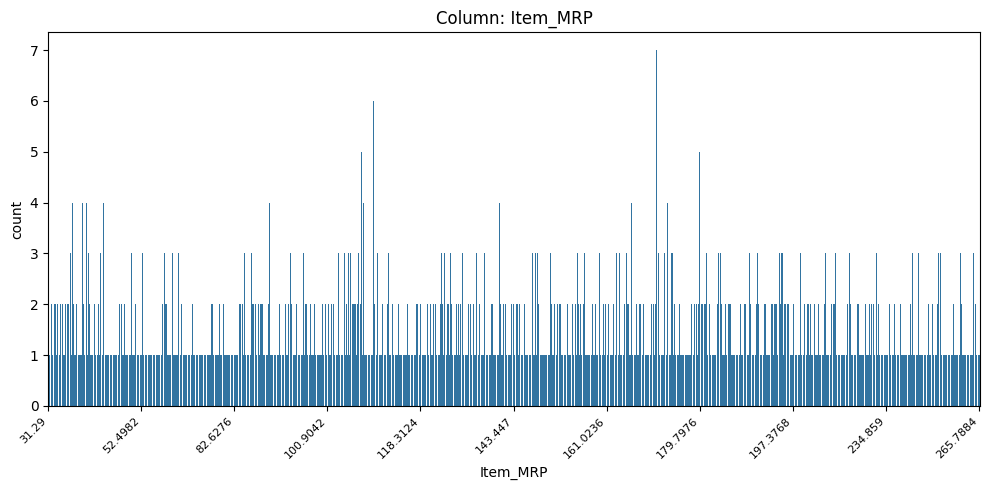

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
The cardinality is high (>10).
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
categorical_viz(df_sales_prediction, x='Item_MRP');

- What type of feature is it?
 - This is a numeric feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is high.
- Would we know this before the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - No. This feature helps in predicting Item Sale prices.

#### Outlet_Identifier
- Unique store ID

<ipython-input-61-2e49b998f4a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


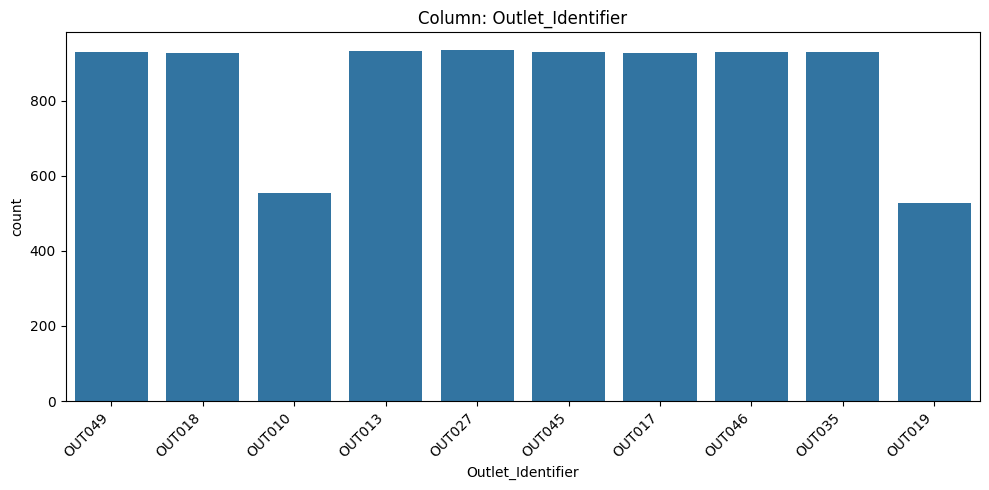

- NaN's Found: 0 (0.0%)
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.
The cardinality is not high (<=10).


In [ ]:
categorical_viz(df_sales_prediction,x='Outlet_Identifier');

- What type of feature is it?
 - This is a Categorical feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is Low.
- Would we know this before the target is determined?
 - No.
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes, most probably. Because this feature does not contribute meaningfully to achieving the business objective.

#### Outlet_Establishment_Year
- The year in which store store was established.

<ipython-input-61-2e49b998f4a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


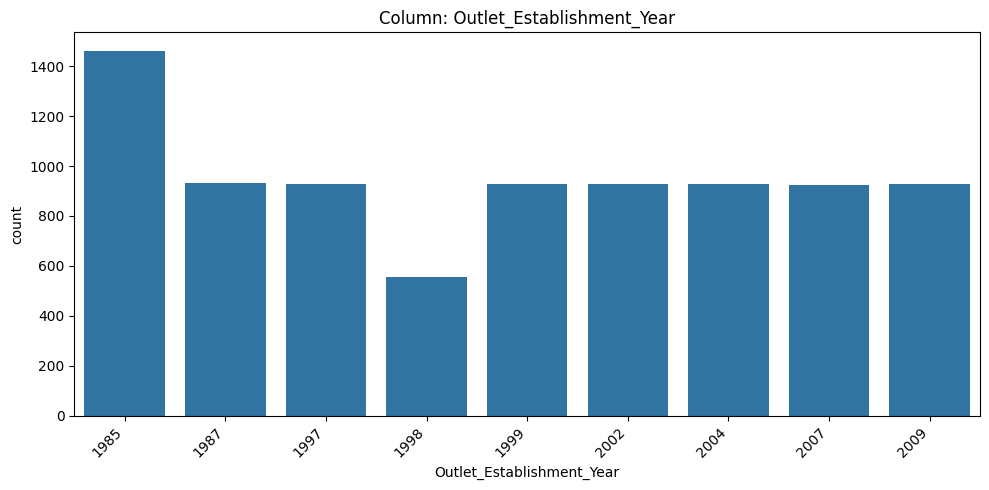

- NaN's Found: 0 (0.0%)
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.
The cardinality is not high (<=10).


In [ ]:
categorical_viz(df_sales_prediction,x='Outlet_Establishment_Year');

- What type of feature is it?
 - This is a Categorical feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is Low.
- Would we know this before the target is determined?
 - No.
- Is there a business case/understanding reason to exclude based on our business case?
 - No. This feature could have a role to play in achieving our business objective because customer loyalty is also built from how long a store has been existence.

#### Outlet_Size
- The size of the store in terms of ground area covered.

<ipython-input-61-2e49b998f4a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


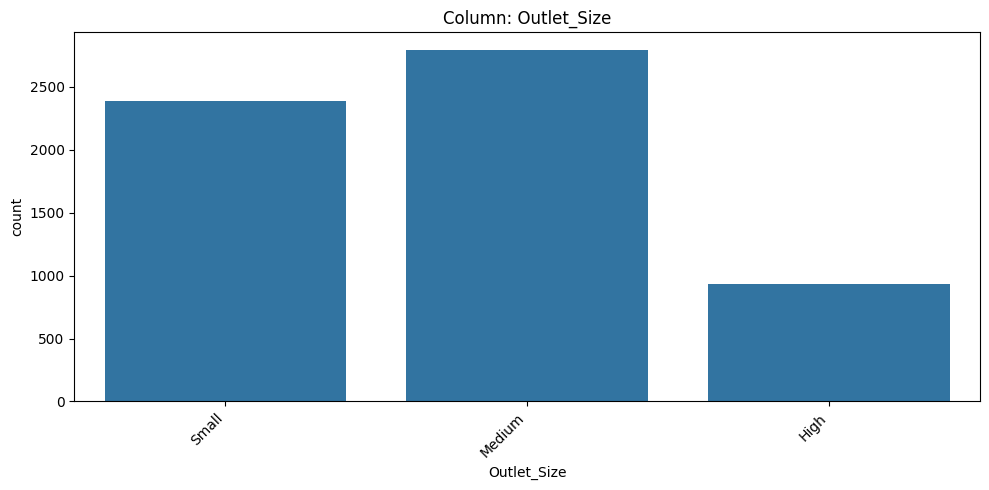

- NaN's Found: 2410 (28.28%)
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.
The cardinality is not high (<=10).


In [ ]:
#creating the order outlet list
order_outlet=['Small','Medium','High']
#changing the column: Outlet_Size to be categorical
df_sales_prediction['Outlet_Size'] = pd.Categorical(df_sales_prediction['Outlet_Size'], categories=order_outlet, ordered=True)
#plotting it:
categorical_viz(df_sales_prediction,'Outlet_Size', order=order_outlet);


- What type of feature is it?
 - This is a ordinal feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 2410 null values (28.28%). I would carry out Predictive Imputation where I predict missing values using machine learning algorithms since the null values are quite many.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is Low.
- Would we know this before the target is determined?
 - yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - No, this feature could contribute significantly to our sales prie prediction model.

#### Outlet_Location_Type
- The type of city in which the store is located.

<ipython-input-61-2e49b998f4a2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


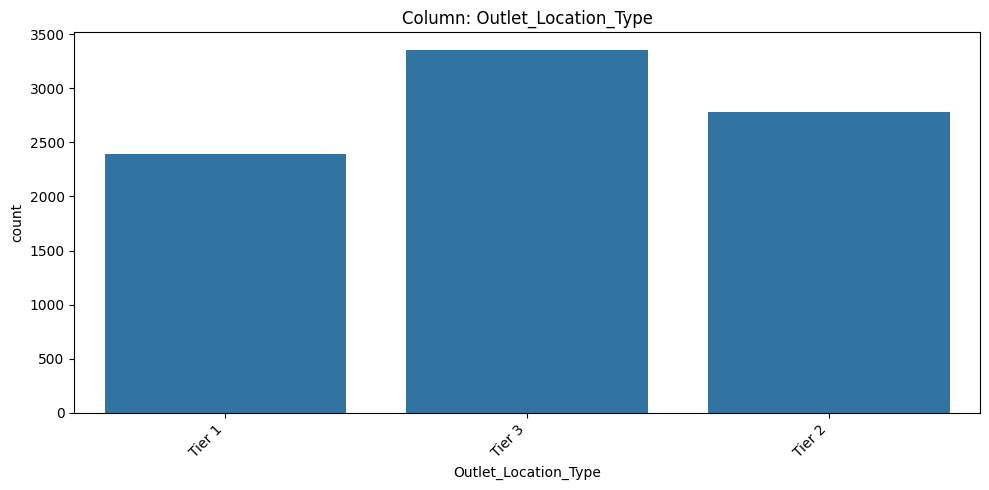

- NaN's Found: 0 (0.0%)
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.
The cardinality is not high (<=10).


In [ ]:
#creating the order outlet list
categorical_viz(df_sales_prediction,'Outlet_Location_Type');

- What type of feature is it?
 - This is an ordinal feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is Low.
- Would we know this before the target is determined?
 - Yes.
- Is there a business case/understanding reason to exclude based on our business case?
 - No, because this feature together with the population niche it serves, significantly contribute to our business case.

####Outlet_Type
- whether the outlet is just a grocery store or some sort of supermarket.

<ipython-input-68-02ade2124d50>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


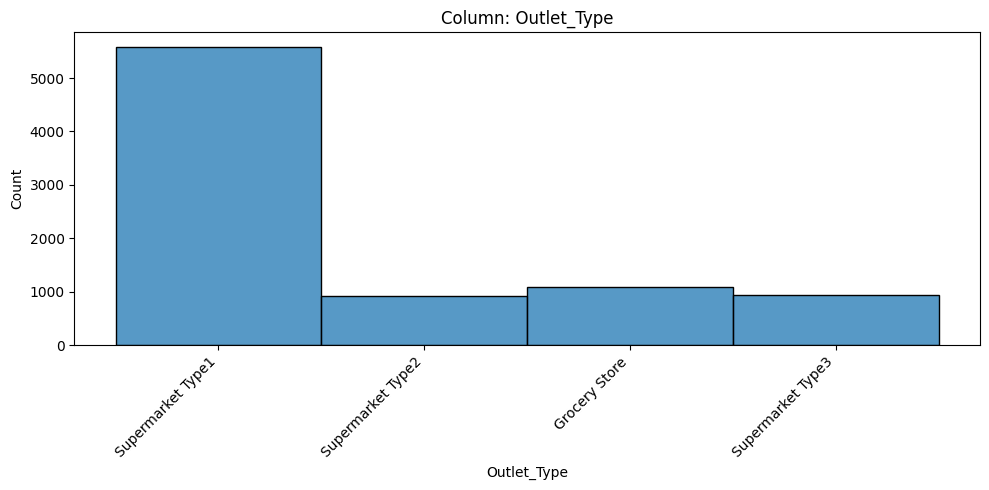

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.
The cardinality is not high (<=10).


In [ ]:
histo_viz(df_sales_prediction,x='Outlet_Type');

- What type of feature is it?
 - This is a categorical feature.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
 - 0 null values. No need to impute.
- Is the feature constant or quasi-constant?
 - This feature isn't constant or quasi-constant hence should be included in the model.
- What is the cardinality? Is it high?
 - The cardinality is Low.
- Would we know this before the target is determined?
 - No.
- Is there a business case/understanding reason to exclude based on our business case?
 - Yes,probaly. Because this feature wouldn't necessarily help our business case.

### Multivariant Visualization

In [ ]:
# Defining a function for Multivariant visualization:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales', figsize=(8, 4),
                               fillna=True, placeholder='MISSING',
                               order=None, step_size=100):
    # Make a copy of the dataframe and fillna
    # fillna with placeholder
    if fillna == True:
        df[x] = df[x].fillna(placeholder)
    # or drop nulls prevent unwanted 'nan' group in stripplot
    else:
        df = df.dropna(subset=[x])

    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=figsize)

    # Barplot
    sns.barplot(data=df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot
    sns.stripplot(data=df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3, zorder=0)

    # Get xtick labels
    labels = ax.get_xticklabels()

    # Calculate step size based on the number of labels
    step_size = max(len(labels) // 10, 1)  # Adjust divisor as needed

    # Rotate xlabels
    ax.set_xticks(range(0, len(labels), step_size))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}")
    fig.tight_layout()

    return fig, ax

#### Item_Identifier

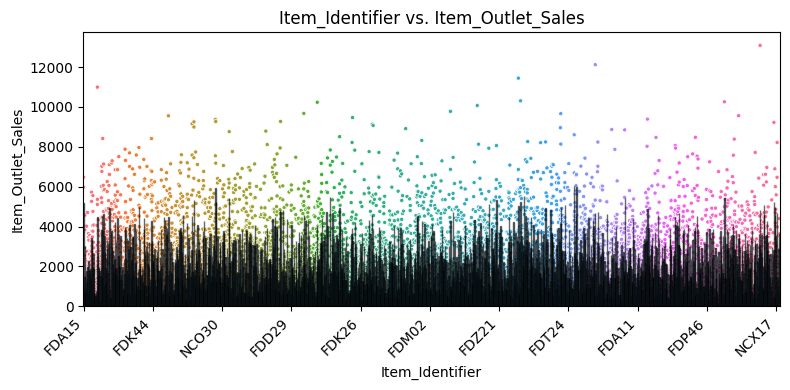

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Item_Identifier', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I wouldn't expect the item identifier to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - No.

#### Item_Weight

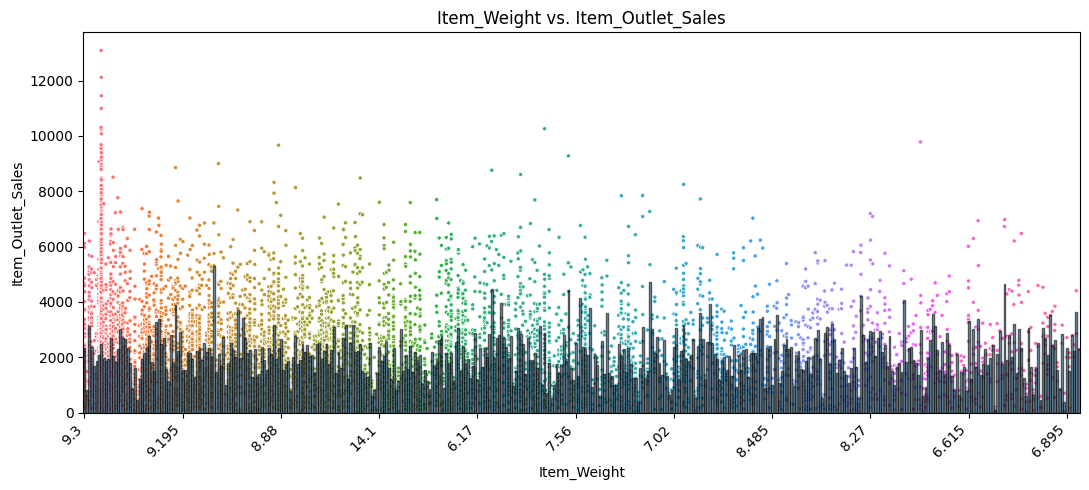

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Item_Weight', y='Item_Outlet_Sales',figsize=(11,5));

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - yes, I would expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Yes. As you can see the Item Outlet sales are increasing as the Item_weight increases.

#### Item_Fat_Content

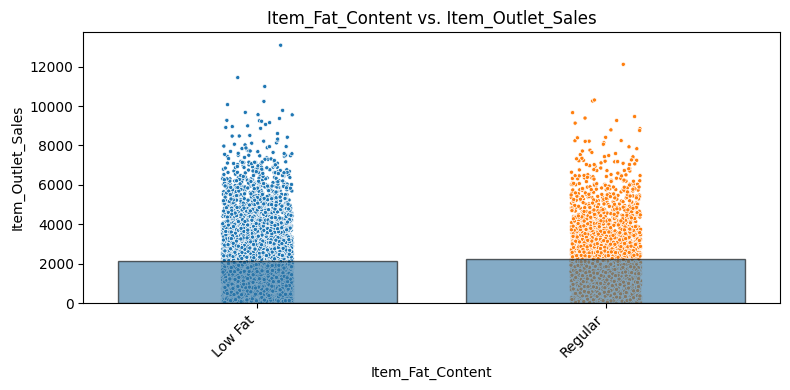

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Item_Fat_Content', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I wouldn't expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Not at all.

#### Item_Visibility

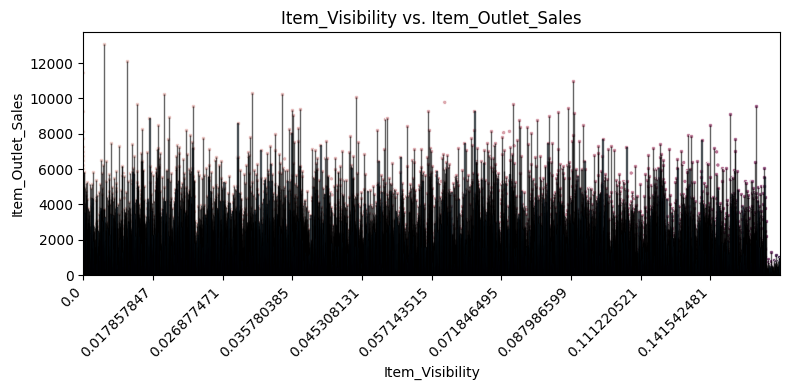

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Item_Visibility', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect item visibility to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - I don't think so.

#### Item_Type

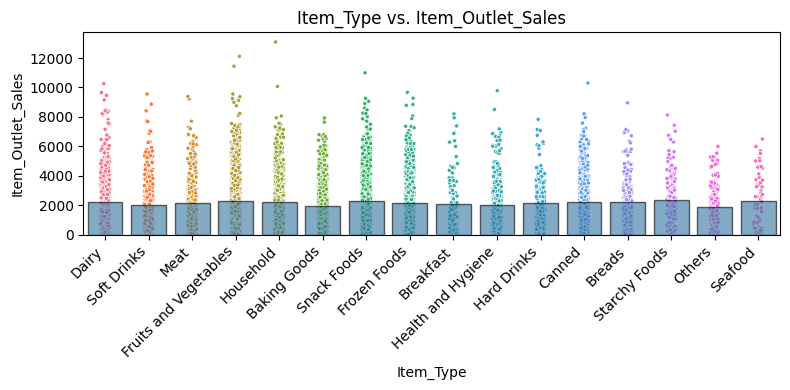

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Item_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - yes, I would expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Not really. But I see this visualization entirely reliant on people's choices/tastes and preferences. Item_type has nothing to do with being a predictor of the Item_Outlet sales.

#### Item_MRP

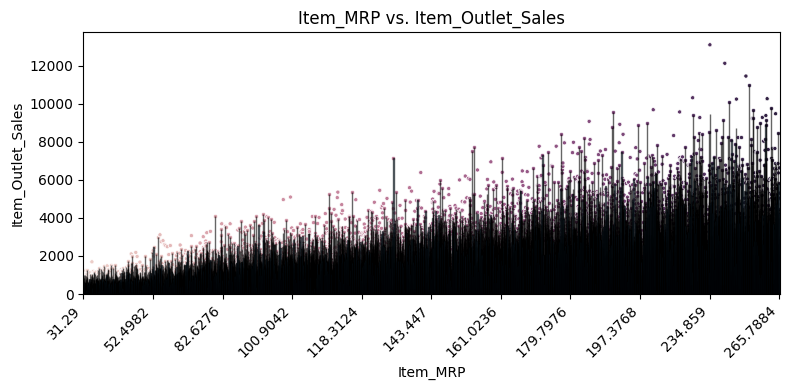

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Item_MRP', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - yes, I would expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Yes it does. As the Item_MRP increases, the Item_Outlet sales are also increasing.

#### Outlet_Identifier

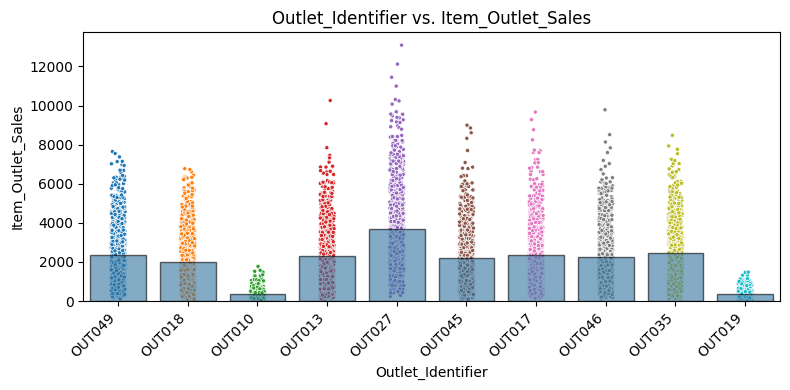

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Outlet_Identifier', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I wouldn't expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Yes, it actually appears to be a predictor of the Item Outlet Sales. As outlet Identifier increases, Item_outlet sales are also increasing.

#### Outlet_Establishment_Year

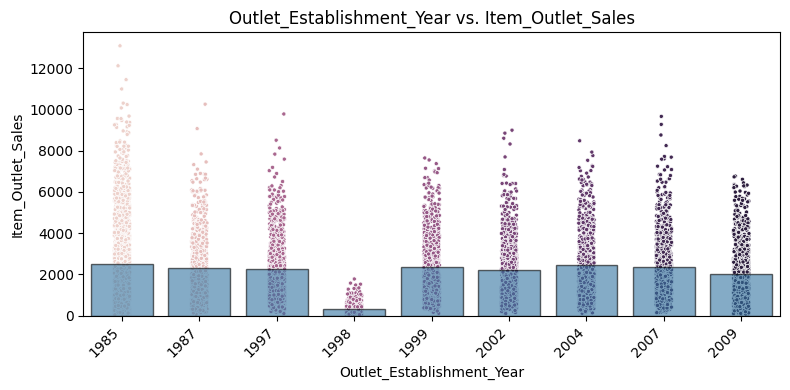

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Outlet_Establishment_Year', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - No, it doesn't seem to be a predictor of the Item Outlet Sales.

#### Outlet_Size

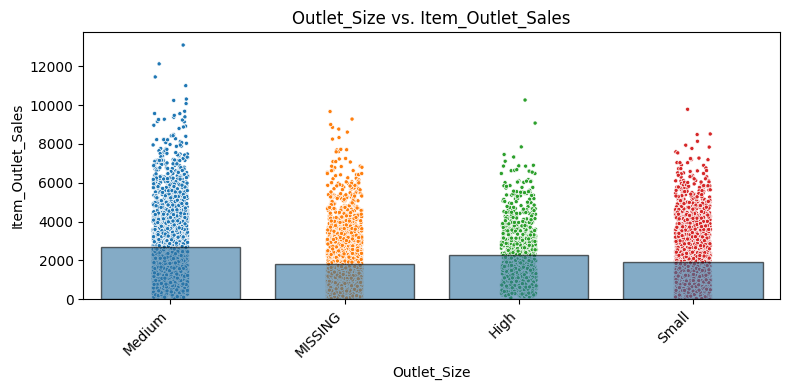

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Outlet_Size', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - No, it doesn't seem to be a predictor of the Item Outlet Sales.

#### Outlet_Location_Type

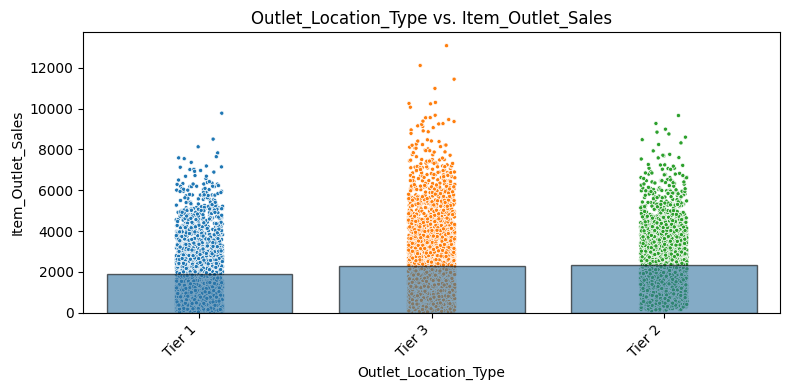

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Outlet_Location_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, I would expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Yes, it seems to be a predictor of the Item Outlet Sales. Progressing from Tier 1 onwards to Tier 3, the Item Outlet sales are increasing.

#### Outlet_Type

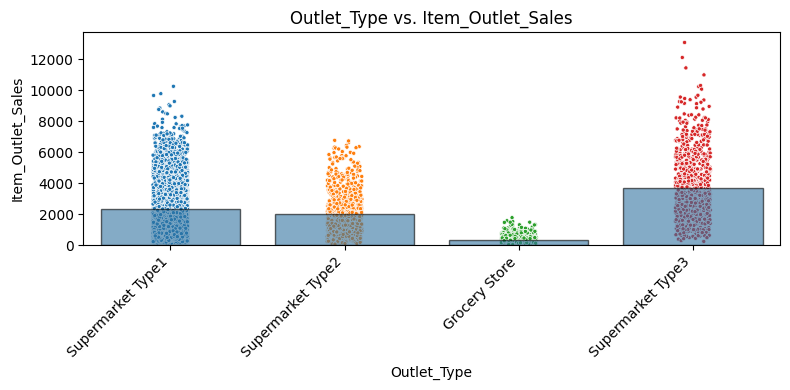

In [ ]:
plot_categorical_vs_target(df=df_sales_prediction, x='Outlet_Type', y='Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, I wouldn't expect it to impact the Item Outlet sales.

- Does this feature appear to be a predictor of the target?
 - Not really. It doesn't seem to be a predictor of the Item Outlet Sales.

- The data types are as expected as per the data dictionary.

- Missing values need to be addressed.
 - Using EDA functions to zero down on how to analyze the missing values.
 - Using respective imputers to fill the missing values.

### Imputation

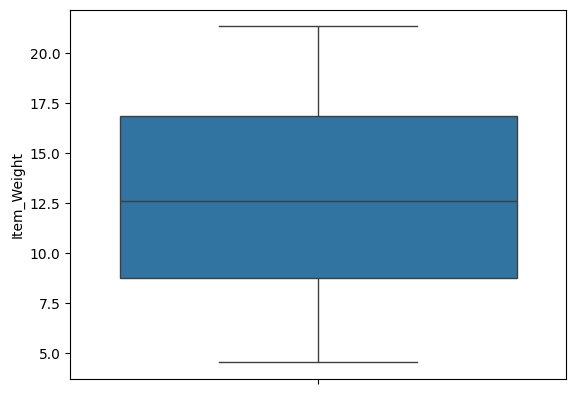

In [ ]:
#Using a boxplot to find out which imputer to use for the numeric_column: 'Item_Weight'
ax=sns.boxplot(df,y='Item_Weight')

- There is no skewness or any outliers in the boxplot. Therefore whether I use the median or mean as an imputer, the results will still be the same.
   - Therefore I'll go ahead and use the median imputer for the numeric column 'Item_Weight'

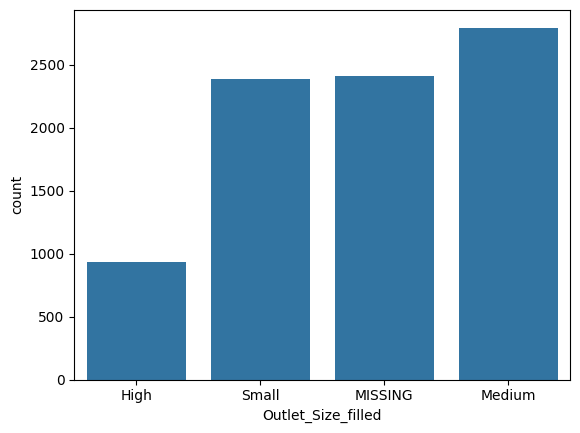

In [ ]:
#Using a countplot to find out which imputer to use for the categorical column: 'Outlet_Size'
order_outlet=['High','Small','MISSING','Medium']

df['Outlet_Size_filled'] = df['Outlet_Size'].fillna('MISSING')
ax=sns.countplot(df,x='Outlet_Size_filled',order=order_outlet)

In [ ]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- Indeed the null values are quite significant and we shall address them by filling them with the 'most_frequent' value.

## Declaring (X) features and the (y) target.

In [ ]:
y=df['Item_Outlet_Sales']
features=df.drop(columns=['Item_Outlet_Sales'])
#Dropping the column 'Item_Identifier' as well because it has a very high cardinality.
X=features.drop(columns=['Item_Identifier'])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler


In [ ]:
#Train_test_Split
X_train,X_test,y_train,y_test=train_test_split(X,y)

## Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
num_cols=X_train.select_dtypes('number').columns
ord_cols=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']
cat_cols=X_train.select_dtypes('object').drop(columns=ord_cols).columns

In [ ]:
#Pipeline for numerical data using the imputer strategy as median
imputer_median=SimpleImputer(strategy='median')
scaler=StandardScaler()
num_pipeline=make_pipeline(imputer_median,scaler)

In [ ]:
#Pipeline for ordinal data
imputer_mos=SimpleImputer(strategy='most_frequent')
#The different categories' orders:
fat_ord=['Regular','Low Fat']
out_size_ord=['Small','Medium','High']
out_loc_ord=['Tier 1','Tier 2','Tier 3']
ordinal_category_orders=[fat_ord,out_size_ord,out_loc_ord]
#Ordinal encoder
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
#Scaling ordinal features
ord_scale=StandardScaler()
#The pipeline
ord_pipeline=make_pipeline(imputer_mos,ord_encoder,ord_scale)


In [ ]:
#pipeline for categorical data:
impute_na=SimpleImputer(strategy='constant',fill_value='MISSING')
#OneHotEncoding
ohe_cat=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
#cat_pipeline
cat_pipeline=make_pipeline(impute_na,ohe_cat)

##The preprocessor

In [ ]:
cat_tuple=('categorical',cat_pipeline,cat_cols)

num_tuple=('numeric',num_pipeline,num_cols)

ord_tuple=('ordinal',ord_pipeline,ord_cols)

col_transformer=ColumnTransformer([cat_tuple,num_tuple,ord_tuple],verbose_feature_names_out=False)


In [ ]:
#Fitting the column transformer on the X_train data:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strat...
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Low '
                                                                              'Fat'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type'])],
                  verbose_feature_names_out=False)

In [ ]:
#Transforming the X_train data:
X_train_processed=col_transformer.transform(X_train)
#Transforming the X_test data:
X_test_processed=col_transformer.transform(X_test)

In [ ]:
#confirming that all columns are numeric dtypes:
X_train_processed.dtypes

Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Starchy Foods            float64
Outlet_Identifier_OUT010           float64
Outlet_Identifier_OUT013           float64
Outlet_Identifier_OUT017           float64
Outlet_Identifier_OUT018           float64
Outlet_Identifier_OUT019           float64
Outlet_Identifier_OUT027           float64
Outlet_Identifier_OUT035           float64
Outlet_Iden

In [ ]:
#Confirming that the transformed numeric features have been scaled:
X_train_processed[num_cols].describe().round(2)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year
count      6392.00          6392.00   6392.00                    6392.00
mean          0.00             0.00     -0.00                      -0.00
std           1.00             1.00      1.00                       1.00
min          -1.95            -1.28     -1.74                      -1.52
25%          -0.83            -0.76     -0.76                      -1.29
50%          -0.05            -0.24      0.02                       0.14
75%           0.78             0.56      0.71                       0.74
max           2.02             5.08      2.02                       1.33

- As can be seen, the transformed numeric features have been scaled since the mean is approximately 0 and the standard deviation is approximately 1.

#CRISP-DM Phase 4 - Modeling

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Instantiating the Linear regression Model:
lin_reg=LinearRegression()

In [ ]:
#Making the pipeline:
lin_reg_pipe=make_pipeline(col_transformer,lin_reg)

In [ ]:
#fitting the model
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Regular',
                                                                                               'Low '
                                                                                               'Fat'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
#Getting predictions to evaluate the model:
y_train_predic=lin_reg_pipe.predict(X_train)
y_test_predic=lin_reg_pipe.predict(X_test)

In [ ]:
#Building a function to evaluate my model:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_metric(y_true, y_pred, split='Dataset'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    header = '-' * 60
    print(header, split, header, sep='\n')
    print(f'- MAE: {mae:,.2f}')
    print(f'- MSE: {mse:,.2f}')
    print(f'- RMSE: {rmse:,.2f}')
    print(f'- R2-Score: {r2:,.2f}')
    print()

In [ ]:
#evaluating my linear regression model:
evaluation_metric(y_true=y_train, y_pred=y_train_predic, split='Training')
evaluation_metric(y_true=y_test, y_pred=y_test_predic, split='Test')

------------------------------------------------------------
Training
------------------------------------------------------------
- MAE: 836.02
- MSE: 1,281,177.38
- RMSE: 1,131.89
- R2-Score: 0.56

------------------------------------------------------------
Test
------------------------------------------------------------
- MAE: 831.44
- MSE: 1,243,333.79
- RMSE: 1,115.05
- R2-Score: 0.58



- To what extent is this model overfit/underfit?
  - The R2-Score of the test set is slightly higher than that of the training set meaning that the model is performing slightly better on unseen data than on training data. The model is not significantly overfitting or underfitting since the difference in R2-Score between the training and test sets is small.But this could easily suggest that the model is slightly overfitting.

## The Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Instantiating the Random Forest regressor:
rf=RandomForestRegressor()

In [ ]:
#Modeling the pipeline to the regressor:
rf_pipeline=make_pipeline(col_transformer,rf)

In [ ]:
#Fitting the model to the training data:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                                 ('numeric',
                                                  Pipeline(steps=...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Regular',
                                                                                               'Low '
                                                                                               'Fat'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Fat_Content',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
#Getting predictions for the training and test data
y_train_predict=rf_pipeline.predict(X_train)
y_test_predict=rf_pipeline.predict(X_test)

In [ ]:
#Using my custom evaluation function to evaluate my Random Forest model:
evaluation_metric(y_true=y_train, y_pred=y_train_predict, split='Training')
evaluation_metric(y_true=y_test, y_pred=y_test_predict, split='Test')

------------------------------------------------------------
Training
------------------------------------------------------------
- MAE: 294.39
- MSE: 182,324.54
- RMSE: 426.99
- R2-Score: 0.94

------------------------------------------------------------
Test
------------------------------------------------------------
- MAE: 796.14
- MSE: 1,270,475.71
- RMSE: 1,127.15
- R2-Score: 0.57



- To what extent is this model overfit/underfit?
  - The r2_score of the training set is much higher than that of the test set meaning that the model is performing very poorly on unseen data.
 The model is indeed overfitting since it has learned the training data too well.

- Which model has the best test scores?
  - For the test data, the Random Forest model has lower MAE compared to the linear regression model, indicating that it performs better in terms of prediction accuracy.
 However, the linear regression model has a slightly higher R2-score (58%) than the R2-score of the Random Forest Model (57%). This difference is significantly small.

  - In summary, when I consider the MAE and r_2 score values, the Random Forest model appears to be a better choice.

### Tuning the Random Forest Model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#selecting which hyperparameters we shall tune:
rf_pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                   ('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strat...
         dtype='object')),
                                   ('ordinal',
                  

In [ ]:
param_grid={'randomforestregressor__n_estimators':[10,50,100,200,300],
            'randomforestregressor__max_depth': [None,10,20,50],
            'randomforestregressor__min_samples_split': [2,5,8,10],
           'randomforestregressor__min_samples_leaf': [1,2,4]}

In [ ]:
#Instantiating the Gridsearch:
grid_search=GridSearchCV(rf_pipeline,param_grid,n_jobs = -1, verbose = 1)

In [ ]:
#fitting the training data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')),
                                                                        ('n...
                                                                          'Outlet_Location_Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 20, 50],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 8,
                                                                      10],
                         'randomforestregressor__n_estimators': [10, 50, 100,
                                                                 200, 300]},
             verbose=1)

In [ ]:
def reg_evaluation(reg, X_train, y_train, X_test, y_test, verbose=True, output_frame=False):
    # Predicting the training set:
    y_train_predict = reg.predict(X_train)
    # Evaluation metrics for training set:
    results_train = evaluation_metric(y_train, y_train_predict, split='Training set')
    # Predicting the test set:
    y_test_predict = reg.predict(X_test)
    # Evaluation metrics for test set:
    results_test = evaluation_metric(y_test, y_test_predict, split='Test set')


    if output_frame:
        results_df = pd.DataFrame({'Training set': results_train, 'Test set': results_test})
        results_df.index.name = None
        results_df.index = ['MAE', 'MSE', 'RMSE', 'R2-Score']
        return results_df.round(3)


In [ ]:
best_model=grid_search.best_estimator_

In [ ]:
#Evaluate my model using my built function:
reg_evaluation(reg=best_model, X_train= X_train, y_train=y_train, X_test=X_test, y_test=y_test)

------------------------------------------------------------
Training set
------------------------------------------------------------
- MAE: 654.71
- MSE: 884,796.80
- RMSE: 940.64
- R2-Score: 0.69

------------------------------------------------------------
Test set
------------------------------------------------------------
- MAE: 762.32
- MSE: 1,168,953.33
- RMSE: 1,081.18
- R2-Score: 0.60



- Compare your tuned model to your default Random Forest model.Did the performance improve?
  - The tuned model's MAE is slightly lower on the test set (762.32) compared to the default model (796.14), indicating improved accuracy.
  - The tuned model's MSE is also lower on the test set (1,168,953.33) compared to the default model (1,270,475.71), indicating better performance in terms of error.
  - The tuned model's RMSE is lower on the test set (1,081.18) compared to the default model (1,127.15), further confirming improved accuracy.
  - The tuned model's R2 score is higher (0.60) compared to the default model (0.57), indicating that the tuned model explains more variance in the target variable.

  - With an overview of all the metrics,the performance of the tuned Random Forest model has improved compared to the default Random Forest model,showing the effectiveness of tuning a model.

# CRISP-DM Phase 5 - Evaluation

- Overall, which model do you recommend?
  - The tuned random forest model has its MAE slightly lower on the test set (762.32) compared to the linear model (831.44), indicating improved accuracy.
  - The tuned random forest model has its MSE also lower on the test set (1,168,953.33) compared to the linear model (1,243,333.79), indicating better performance in terms of error.
  - The tuned random forest model has its RMSE lower on the test set (1,081.18) compared to the linear model (1,115.05), further confirming improved accuracy.
  - The tuned random forest model has its R2 score higher (0.60) compared to the default model (0.58), indicating that the tuned model explains more variance in the target variable.

  - With this overview,I would recommend the tuned Random Forest model.

- Interpret the tuned Random Forest model's performance based on R-squared.
   - The R-squared (R2) score is a measure of how well the model explains the variance in the target variable. A higher R2 score indicates that the model can better predict the variation in the target variable. In the case of the tuned Random Forest model, it achieved an R2 score of 0.60, which is higher compared to both the default Random Forest and linear regression models.
   - This means that the tuned model explains more of the variance in the target variable than the other models, indicating a better predictive performance.

- I would also select the MSE to express the performance of my tuned Random Forest model when expressing the model performance to a stakeholder. The low MSE on the test set (1,168,953.33) indicates a better performance in error compared to the MSEs of the default Random Forest Model (1,168,953.33) and the Linear Regression model(1,270,475.71). This shows that the tuned Random Forest Model will perform well on the unseen data.

- When comparing the training vs. test scores of the tuned Random Forest Model to explain if the model is overfit/underfit?
  - The MAE is slightly lower on the training set (654.71) compared to the test set (762.32). This shows that the model's predictions are closer to the actual values on the training data than on the unseen test data.

  - The MSE is also lower on the training set (884,796.80) compared to the test set (1,168,953.33). This indicates that the model's predictions deviate less from the actual values on the training data than on the test data.

  - The RMSE is lower on the training set (940.64) compared to the test set (1,081.18). A lower RMSE on the training set suggests that the model has small errors around the mean of the training data compared to the test data.

  - The R2 score on the training set is slightly higher (0.69) compared to test set (0.60). This indicates that a larger proportion of the variance in the target variable is explained by the model on the training data compared to the test data.

  - In conclusion, this model is overfit seeing that it fits better on the training data than the test data.

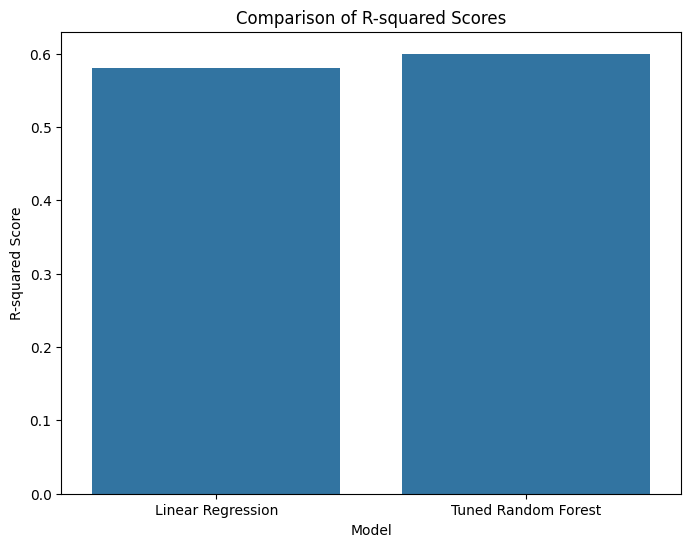

In [ ]:
#Plotting a barplot to show the R-squared scores between the linear regression and default random forest models
# Define the R-squared scores
r2_lin = 0.58
r2_tun_rf = 0.60

# Create a DataFrame to use in barplot
data = {'Model': ['Linear Regression', 'Tuned Random Forest'],
        'R-squared Score': [r2_lin, r2_tun_rf]}
df2 = pd.DataFrame(data)

# Plotting the barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df2, x='Model', y='R-squared Score')
ax.set_title('Comparison of R-squared Scores')
ax.set_ylabel('R-squared Score')
plt.show()


- This barplot visualization shows that the random forest model explains a slightly higher proportion of the variance in the target variable compared to the linear regression model.

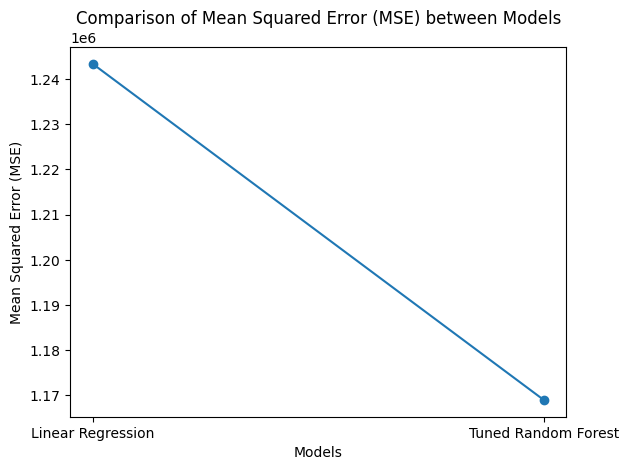

In [ ]:
#comparing the mean squared error (MSE) values between the 2 models using a lineplot:

# The data
models = ['Linear Regression', 'Tuned Random Forest']
mse_values = [1243333.79, 1168953.33]

# Creating the line plot
plt.plot(models, mse_values, marker='o', linestyle='-')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) between Models')

plt.show()

- This visualization shows the difference in the predictive performance between the two models.
- The MSE of the tuned Random Forest model is lower than that of the linear regression model, showing that the tuned Random Forest model has a lower predictive error and potentially a better predictive performance.